# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [158]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [159]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import string
from sklearn.pipeline import Pipeline


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [160]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(filename, header=0)

In [161]:
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [162]:
# YOUR CODE HERE
# Check for missing values
count = df.isnull().sum()
percentage = ((df.isnull().sum()/len(df)*100))
missing_data = pd.concat([count, percentage], axis=1, keys=['Count', 'Percentage'])

missing_data

,Count,Percentage
Review,0,0.0
Positive Review,0,0.0


In [163]:
# Renaming features
df.rename(columns={'Review': 'review_text', 'Positive Review': 'label_positive'}, inplace=True)
df.head()

,review_text,label_positive
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [164]:
# Summary statistics of the dataset
summary_stats = df.describe().transpose()
summary_stats

,count,unique,top,freq
review_text,1973,1865,I have read several of Hiaasen's books and lov...,3
label_positive,1973,2,False,993


Positive Reviews: 49.67%
Negative Reviews: 50.33%


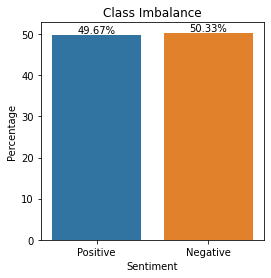

In [165]:
# Check class imbalance
pos_percentage = df["label_positive"].value_counts(normalize=True)[1]*100
neg_percentage = df["label_positive"].value_counts(normalize=True)[0]*100
print(f'Positive Reviews: {"{:.2f}".format(pos_percentage)}%')
print(f'Negative Reviews: {"{:.2f}".format(neg_percentage)}%')

# Visualize class imbalance
plt.figure(figsize=(4, 4))
sns.barplot(x=["Positive", "Negative"], y=[pos_percentage, neg_percentage])
plt.title("Class Imbalance")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")

# Display percentage values
for index, value in enumerate([pos_percentage, neg_percentage]):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')


plt.show()

In [166]:
# Cleaning reviews content
def cleaning(text):
    # Lowercase
    text = text.lower()
    # Tokenize the text into words using spaces
    words = text.split()
    # Remove punctuation from each word
    text = [word.strip(string.punctuation) for word in words]
    # Remove digits
    text = ["".join(c for c in word if not c.isdigit()) for word in text]
    text = " ".join(text)

    return text

# Cleaning text in dataset
cleaned = lambda x: cleaning(x)
df['cleaned_review_text'] = pd.DataFrame(df['review_text'].apply(cleaned))
df.head()

,review_text,label_positive,cleaned_review_text
0,This was perhaps the best of Johannes Steinhof...,True,this was perhaps the best of johannes steinhof...
1,This very fascinating book is a story written ...,True,this very fascinating book is a story written ...
2,The four tales in this collection are beautifu...,True,the four tales in this collection are beautifu...
3,The book contained more profanity than I expec...,False,the book contained more profanity than i expec...
4,We have now entered a second time of deep conc...,True,we have now entered a second time of deep conc...


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [167]:
# YOUR CODE HERE
# Create labels
y = df['label_positive']
X = df['cleaned_review_text']

X.head()

0    this was perhaps the best of johannes steinhof...
1    this very fascinating book is a story written ...
2    the four tales in this collection are beautifu...
3    the book contained more profanity than i expec...
4    we have now entered a second time of deep conc...
Name: cleaned_review_text, dtype: object

In [168]:
# Splitting labeled into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [145]:
X_train.head()

416     boring tasteless and unoriginal photographer h...
628     the book starts off ok with a good introductio...
332     one at the front the really own words of the m...
1338    ever since starting on the simple abundance jo...
874     this book was written in  updated in  it has a...
Name: cleaned_review_text, dtype: object

In [150]:
# Try confusion matrix
# Create a TfidVectorizer object
tfidf_vect = TfidfVectorizer()
# Initialize the model
model_rf = RandomForestClassifier(criterion='entropy', n_estimators=100)
                                  
model = Pipeline([('vectorizer', tfidf_vect), ('classifier', model_rf)])

# Fit the vectorizer to X_train
# Fit the model
model.fit(X_train, y_train)
                                  
predictions = model.predict(X_test)
                                  
confusion_matrix(predictions, y_test)


array([[163,  44],
       [ 32, 156]])

In [152]:
accuracy = accuracy_score(predictions, y_test)
precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.8075949367088607
Precision: 0.78
Recall: 0.8297872340425532


This output shows that the model has been trained kind of well due to high accuracy score, precision, and recall score.
However, I will try other 

In [170]:
# Other ways:
# Create a TfidVectorizer object
tfidf_vect = TfidfVectorizer()

# Fit the vectorizer to X_train
tfidf_vect.fit(X_train)

# Transform training data
X_train_tfidf = tfidf_vect.transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vect.transform(X_test)

# RandomForestClassifier
# Initialize the model
model_rf = RandomForestClassifier(criterion='entropy', n_estimators=100)
model_rf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
predictions = model_rf.predict(X_test_tfidf).tolist()

In [171]:
predictions

[False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,


In [172]:
y_test

759     False
297      True
1421     True
350      True
1103     True
        ...  
71      False
620     False
259     False
51      False
198     False
Name: label_positive, Length: 395, dtype: bool

In [173]:
# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print('Accuracy score: ', accuracy)

Accuracy score:  0.8227848101265823


This method is better than using confusion matrix. 

In [176]:
# Try to improving model performance by cross-validation
accuracy_cross = cross_val_score(model_rf, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print('Accuracy Cross-Validation: ', accuracy_cross)
print('Mean Accuracy Score: ', accuracy_cross.mean())
print('The standard deviation: ', accuracy_cross.std())

Accuracy Cross-Validation:  [0.80696203 0.76898734 0.80696203 0.79047619 0.73333333]
Mean Accuracy Score:  0.7813441832429173
The standard deviation:  0.02776211253234267


This process doesn't help improve performance at all.